---
# Lab 0: Introduction to Statistical Computing Languages
 date: Fri Jan 5 2023    
 modified date: Sun June 16 2024  
 categories: [midway, local, Posit cloud] # to help you decide where you can run this markdown comfortably  
output:  
  &ensp; html_document:  
    &emsp; toc: true  
    &emsp; toc_float: true  
     &emsp; highlight: textmate  
     &emsp; number_sections: true  

---
*Created by Max Winston with contributions from Charles Washington III, Ankeeta Shah, Yanyu Liang, Erik McIntire, and Jing Gu*  
*Modified by Ethan Zhong for Winter 2023*  
*Modified by Temi Adeluwa for Winter 2024*  
*Modified by Weigang Zheng for Summer 2024*  



# Introduction

This class is designed to introduce a variety of concepts, methods, and tools utilized in statistical genetics. 
The majority of tools used to employ these methods and concepts require knowledge of computing languages, specifically Unix and R.
Some of you may be familiar with many of these concepts. If so, please stay behind to help you classmates. You will get participation credit :) 

In today's lab, we will cover the basic syntax of these languages and some basic commands necessary for operating statistical genetics programs. Here are some additional resources for your reference - 

Unix: \
http://www.ee.surrey.ac.uk/Teaching/Unix/ \
https://programminghistorian.org/en/lessons/intro-to-bash 

R: \
https://datasciencebook.ca/ \
http://rafalab.dfci.harvard.edu/dsbook/ \
https://r4ds.hadley.nz/ 

By the end of this lab, you should understand how to perform the following: 

- **Navigate in R and Unix**
- **Download and install software packages in Unix**
- **Write looped bash commands to run in Unix**
- **Manipulate large text files in Unix**
- **Import data files into R**
- **Manipulate and visualize files in R**

# Midway3 and Posit Cloud
We will be using Midway3 and Posit Cloud (formerly RStudio Cloud) for computer labs this quarter.

After joining the StatGen2024 workspace on Posit Cloud, click on **Lab-00-Intro-Computing**. 
This should create a private project for you to follow today's lab.

Click on Terminal and check the files in your directory. What do you see?

There is also a panel at the bottom right of your RStudio interface, which shows 
the files stored in your current directory. Click on lab_0.ipynb. You can copy and run the code in terminal to follow the lab.

# Commonly used commands in Unix

## List of Basic Commands

Command       |       Description
-----------   |   ---------------------------------------------------------
**pwd**       |   Print working directory (tells you where you are)
**cd**        |   Change directory
**mkdir**     |   Make directory
**ls**        |   List information about files
**mv**        |   Moves or renames files or directories
**rm**        |   Deletes files (can remove directories with -rf)
**cp**        |   Copy a file to a new location (can copy directories with -r)
**scp**       |   Secure copy a file (for transferring files between a remote server and local system)
**cat**       |   Concatenate and print the content of files to screen
**sed**       |   Stream editor (for searching, finding, and replacing text)
**"pipe"**    |   Uses the output of one command as the input for another
**>**         |   Writes output into file (must enter file name after, will overwrite)
**>>**        |   Writes output into file (must enter file name, will append, not overwrite)
**curl**      |   Transfer a URL (downloads something from the Internet)
**wget**      |   Transfer a URL (downloads something from the Internet)
**tar**       |   Creates tape archives and adds or extracts files
**ssh**       |   Remote log-in command (Secure Shell client)
**emacs**     |   Opens emacs text editor
**vim**       |   Opens vim text editor
**nano**      |   Opens nano text editor
**man**       |   Access manual for any command (exit = q)
**top**       |   Observe computer's tasks
**sort**      |   Sorts a file (extensive options to direct this command)
**head**      |   Look at the first ten lines of file (useful for large files)
**tail**      |   Look at the last ten lines of file (useful for large files)
**./**        |   Existing directory (not a command)
**../**       |   Directory contaiing existing directory (not a command)
**grep**      |   Prints lines matching a pattern (helpful for manipulating large files)

SLURM specifics       |       Description
-------------------   |   ---------------------------------------------------------
**sbatch**            |   Submits a job to the server 
**sinterative**       |   Submits an interactive job to the server (Our labs will use it a lot)
**squeue**            |   Status of a job you've submitted to the server

SLURM is the job scheduler for Midway server. Check out the Midway User Guide for more information: https://rcc.uchicago.edu/docs/using-midway/index.html. We won't get on Midway for today's lab.

### Tab-Completion

Tab completion is helpful for both speed and accuracy. The following exercise will demonstrate this:

- 1) **Make a directory with a really long name.**
- 2) **Start typing the name of the directory.**
- 3) **Hit tab.** The directory should complete itself.
- 4) **Move back into the previous directory.**
- 5) **Start typing the name of the directory, intentionally introducing an error.**
- 6) **Hit tab.** Notice nothing happens, this indicates you've made an error.
- 7) **Remove this directory using tab completion.** DO NOT use rm -r unless you are 100% confident with what you are doing.

In [ ]:
mkdir never_create_a_directory_like_this/                       ##Step 1  
cd never_                                                       ##Step 2
[tab, then enter]                                               ##Step 3
cd ..                                                           ##Step 4
cd nver_                                                        ##Step 5
[tab]                                                           ##Step 6
rm -r never_[tab, then enter]                                   ##Step 7

## Downloading and unpacking files and programs

Frequently, you may need files or programs that are not already installed on your computer or server. Often these files are compressed, and often these files are in 'tarballs', which have the extension .tgz. IMPUTE2 is a program we'll use later in the quarter, so let's download and unpack it:

- 1) **Download the IMPUTE2 tarball from the internet**. Here we download the tarball and write it into the *impute2.tgz* file
- 2) **Unpack the tarball**.

In [6]:
##Step 1
cd / <your_directory> /HGEN471-class/labs/data/lab0/  # you should change this 

#curl https://mathgen.stats.ox.ac.uk/impute/impute_v2.3.2_x86_64_static.tgz > impute2.tgz   
#Or
wget -c -O impute2.tgz https://mathgen.stats.ox.ac.uk/impute/impute_v2.3.2_x86_64_static.tgz    

##Step 2
tar -zxvf impute2.tgz                                                                                 

--2024-06-17 10:30:10--  https://mathgen.stats.ox.ac.uk/impute/impute_v2.3.2_x86_64_static.tgz
Resolving mathgen.stats.ox.ac.uk (mathgen.stats.ox.ac.uk)... 163.1.210.102
Connecting to mathgen.stats.ox.ac.uk (mathgen.stats.ox.ac.uk)|163.1.210.102|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

impute_v2.3.2_x86_64_static/
impute_v2.3.2_x86_64_static/Example/
impute_v2.3.2_x86_64_static/Example/example.chr22.1kG.annot.legend
impute_v2.3.2_x86_64_static/Example/example.chr22.1kG.haps
impute_v2.3.2_x86_64_static/Example/example.chr22.1kG.legend
impute_v2.3.2_x86_64_static/Example/example.chr22.hm3.haps
impute_v2.3.2_x86_64_static/Example/example.chr22.hm3.legend
impute_v2.3.2_x86_64_static/Example/example.chr22.map
impute_v2.3.2_x86_64_static/Example/example.chr22.one.phased.impute2
impute_v2.3.2_x86_64_static/Example/example.chr22.one.phased.impute2_info
impute_v2.3.2_x86_64_static/Exa

Once a program is unpacked, generally there is a README file that you can open with a text editor command (emacs/nano/vim/etc.), however, every program is different, and reading the manual is the only sure way to install the program correctly.

## Manipulating text files

Often you may have a large text file that you want to manipulate in some way. Using a variety of commands in combination is usually the most effective way to do this, and the "pipe" command allows for a more condense syntax where you use the output of one command as the input for the next.

As a quick example, we will use a file from the IMPUTE2 directory. Specifically, the mapping file provides a fine-scale recombination map with three columns: (1) physical position (in base pairs), (2) recombination rate between current position and next position in map (in cM/Mb), (3) and genetic map position (in cM). Since you may be interested in the physical positions with the greatest recombination rates, we can easily get a list of the top ten using the following:

- 1) **Change to the Example directory.**
- 2) **Manipulate the mapping file to create top ten list.** We will name this *"top_ten.map"*.
- 3) **Rename the file.**  *"top_ten.map"* is not as informative as *"top_ten_recomb.map"*.

In [1]:
cd / <your_directory> /HGEN471-class  # you should change this 
PATHa=`pwd`
cd labs
PATHb=`pwd`

In [2]:
cd $PATHb/data/lab0/impute_v2.3.2_x86_64_static/Example/  ##Step 1
cat example.chr22.map | sort -k2nr | head > top_ten.map       ##Step 2
mv top_ten.map top_ten_recomb.map  ##Step 3


## Writing bash scripts

Having the capability to write bash scripts which can be run in the Unix environment is critical, especially for running replicates or collating results from a command-line program. We will write a bash script using the vim text editor, and then run it. Alternatively, feel free to use your own text editor (emacs, textwrangler, etc.) to write the script below. Please start with the following: 

- 1) **Create a new script file** We will name ours test.sh
- 2) **Add path to bash interpreter at the top of the file**
- 3) **Write a for-loop to append 5 numbers under top_ten_recomb.map**
- 4) **Save and exit**
- 5) **Run script**

In [9]:
#vim test.sh                                                       ##Step 1  

#[now in vim, type "i" to allow you to insert text]  

##!/bin/bash                                                       ##Step 2

for j in {1..5}                                                   ##Step 3
do                                                                ##Step 3
    echo $j >> top_ten_recomb.map                                 ##Step 3
done                                                              ##Step 3

                                                                  ##Step 4
#[exit vim by first pressing "Esc" and then ":wq" to save and quit (use :q! to quit without saving any changes you made)]

#bash test.sh                                                      ##Step 5

# Basic commands in R

R is used widely for scientific computing, however, the syntax is notably different than Unix. Specifically, two of the most visible differences are that variables are usually assigned with the assignment operator (<-) operator, although you can use the equal to (=) also, and functions are applied using parentheses. While R can be accessed and R scripts can be run within the Unix environment, it is often preferable to operate R within the graphical user interface (GUI) known as RStudio. Unlike many poorly made GUIs that offer little advantage to a Unix environment, RStudio offers many organizational and functional benefits.

## Paths in R
Paths are very important; they tell the computer where to look for files or folders. Usually, we will have to tell the computer where to look for files. We do this by giving it a path. Paths can be relative or absolute:

- relative paths go from where your script is located i.e. the current directory, and from there finds its way to other locations.
- absolute paths go from the root directory of the computer to other locations. 

For reproducibility, especially when sharing scripts with friends or collaborators, relative paths are preferred. 

In R, you can check your current working directory (to figure out where you are) by doing

In [ ]:
conda activate cumc_statgen 
cd $PATHb 

In [4]:
Rscript  --version 

Rscript (R) version 4.3.3 (2024-02-29)


In [ ]:
getwd() 

Then you can set or change your location

In [ ]:
# you should change this
setwd('/ <your_directory> /HGEN471-class/labs') # you should change this
getwd() 

Alternatively, you can define a variable that you will consistently use as a path.

In [4]:
#myWorkingFolder <- '/ <your_directory> /HGEN471-class' # you should change this
#Or
myWorkingFolder <- getwd()

Then you can use this to navigate to different locations relatively e.g.

In [ ]:
file.path(myWorkingFolder, 'data', 'lab_0')

The idea here is that we construct the string to the path such that every argument is a directory until the last one, which may be a file, or directory.

## Pipes in R
Let us assume want to migrate to a folder, and count the number of files in the folder. In R, you would do something such as

In [6]:
#Run this to see what it returns.
length(list.files(file.path(myWorkingFolder, 'data', 'lab_0')))

[1] 3

If you intend to do many more complex processes, you may lose sight of what parameters or parenthesis go where. In this case, you may pipe the output of one function into the next by using the native R's `|>`.

In [7]:
file.path(myWorkingFolder, 'data', 'lab_0') |> list.files() |> length()

[1] 3

There is another more sophisticated pipe, the {magrittr} pipe `%>%`, which is much better and easier to use. This is [a great blog to read](https://ivelasq.rbind.io/blog/understanding-the-r-pipe/) on the pipe operators in general.

## Reading in data files

Although data can be simulated, generated, and analyzed all within R, often we may want to visualize or analyze data from some other source. We can learn R syntax by learning how to import new data.

There are a number of packages and functions that help with reading data in R including `utils::read.csv`, `utils::read.table`, `data.table::fread`, e.t.c.

The functions from utils are fine for small files. When the size of a file gets big, some packages such as data.table offer more sophisticated functions that can read the data very fast.

In [8]:
# remember that we need to tell R where to look for the data
new_data <- read.table(file.path(myWorkingFolder, 'data/lab_0', 'lab_0_r_data.txt'), header = T)

As a side note, when importing large genetic dataset into R, we rarely use read.table (too slow!). Instead, we use fread from data.table library. We will also time the different code blocks.

In [9]:
# install.packages(c("data.table", "R.utils"))
library(data.table)

- using utils::read.table

In [10]:
start_time <- Sys.time()
temp <- read.table(file.path(myWorkingFolder, 'data/lab_0', 'gwas_chr1_chr2.txt.gz'), header = T)
end_time <- Sys.time()
rm(temp)
gc()

end_time - start_time

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,657199,35.1,4516272,241.2,3419915,182.7
Vcells,3260792,24.9,37564564,286.6,42420798,323.7


Time difference of 7.025473 secs

- using data.table::fread

In [11]:
start_time <- Sys.time()
temp <- fread(file.path(myWorkingFolder, 'data/lab_0', 'gwas_chr1_chr2.txt.gz'), header = T)
end_time <- Sys.time()
rm(temp)
gc()

end_time - start_time

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,716888,38.3,3613018,193.0,3419915,182.7
Vcells,3370645,25.8,30051652,229.3,42420798,323.7


Time difference of 0.8642352 secs

## Exploring objects, functions, and packages

In [12]:
dim(new_data)

[1] 16  2

In [13]:
class(new_data)

[1] "data.frame"

Here we can see that the dimensions of new_data are 16 rows and 2 columns, and that it is in data frame format. This is important to know since different functions apply differently to different classes, which may cause errors. While dim and class can be used to explore objects, you may want to explore these functions themselves. This is done by this simple syntax:

In [14]:
?dim
?class

dim {base},R Documentation
x,"an R object, for example a matrix, array or data frame."
value,"For the default method, either NULL or a numeric vector, which is coerced to integer (by truncation)."


Notice that both dim and class are relatively simple functions with few arguments, so you probably won't have to read the documentation much for either function. As you start invoking more complicated functions (which is inevitable in statistical genetics research), you will spend a lot of time reading the documentation.

## List of basic classes and functions

Class          |       Description
-----------    |   ---------------------------------------------------------
**numeric**    |   Object is numeric (interger or double)
**integer**    |   Object is integer (not double)
**double**     |   Object is double
**character**  |   Object is not numeric, composed of characters
**vector**     |   One-dimensional, can contain numeric or characters
**matrix**     |   Two-dimensional, can contain numeric or characters
**array**      |   Multi-dimensional, can contain numeric or characters
**data frame** |   A list of vectors of equal lenght, each vector contains same class
**list**       |   A list of various generic vectors

Functions are how you execute your commands and write your scripts. It is critical to ensure the arguments are of the correct class (read documentation), as most user-errors originate from providing data in the inappropriate class or dimension. 

Function                |       Description
-----------             |   ---------------------------------------------------------
**c(1,2,3)**            |   Concatenate *numbers* into a vector
**c(1:10**              |   Concatenate from *number* 1 to *number* 10 in a vector
**c("a","b","c")**      |   Concatenate *characters* into a vector
**cbind(x,y,z)**        |   Binds *vectors x,y,z* into matrix by columns
**rbind(x,y,z)**        |   Binds *vectors x,y,z* into matrix by rows
**matrix(x,nrow,ncol)** |   Creates matrix from *vector x* with *nrow* rows and *ncol* columns
**array(x,dim=y)**      |   Creates array from *vector x* with dimensions of *vector y*
**rep(x,y)**            |   Creates vector repeats *vector x interger y* times
**length(x)**           |   Returns length of object *x*
**sample(x,size=n)**    |   Samples number of items (*n*) from elemetns of *object x*
**subset(x,subset)**    |   Subsets *object x* by conditions of *subset*
**mean(x)**             |   Returns arithmetic mena of *numeric object x*
**sd(x)**               |   Returns standard deviation of *numeric object x*
**max(x)**              |   Returns maximum value of *numeric object x*
**min(x)**              |   Returns minimum value of *numeric object x*
**t(x)**                |   Transposes *matrix x*
**plot(x,y)**           |   Plots elements of *vector x* agains elements of *vector y*
**boxplot(x~y)**        |   Generates boxplots for values of *numeric vector x* by grouping *vector y*
**lm(x~y)**             |   Generates a linear model for response *vector x* by predictor *vector y*
**density(x)**          |   Estimates density distributions of univariate observations
**table(x)**            |   Returns summary of frequencies of all values in R object


## Simple Plotting

Sometimes the first thing you want to do is generate a really quick plot of your data before anything else. This is one of the advantages of R, in that visualizing data is very intuitive and easy because it is object-oriented. For example, if you want to plot the first column versus the second column of data from your object, use the following command:

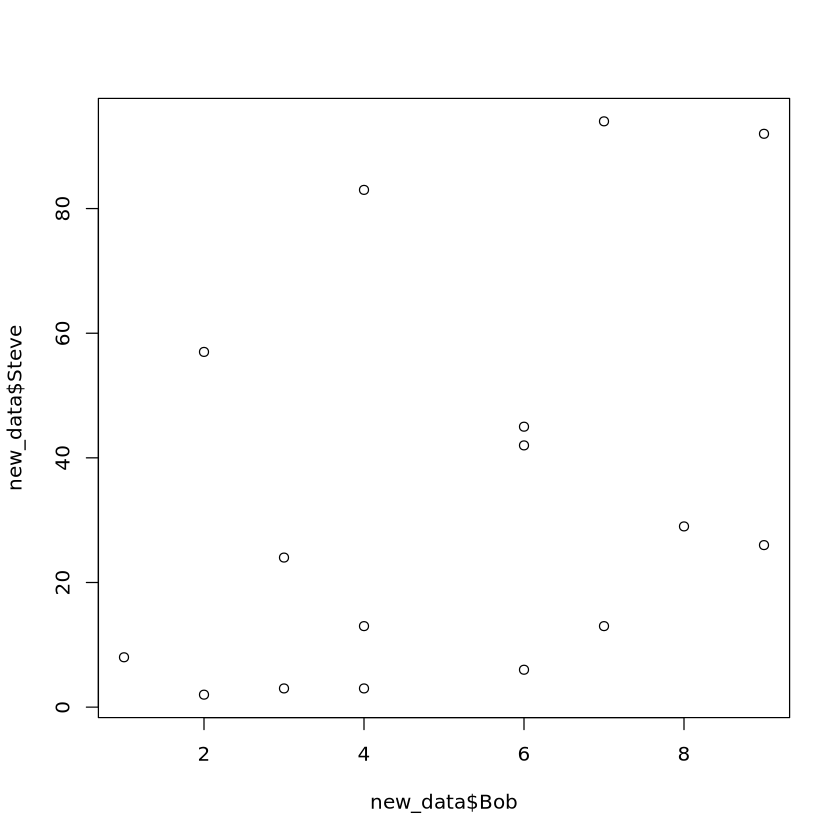

In [15]:
plot(new_data$Bob, new_data$Steve)

While we do get to see the data quickly, it's kind of messy. To give the same plot a title and label the axes, you can do this easily by adding the following arguments to the command:

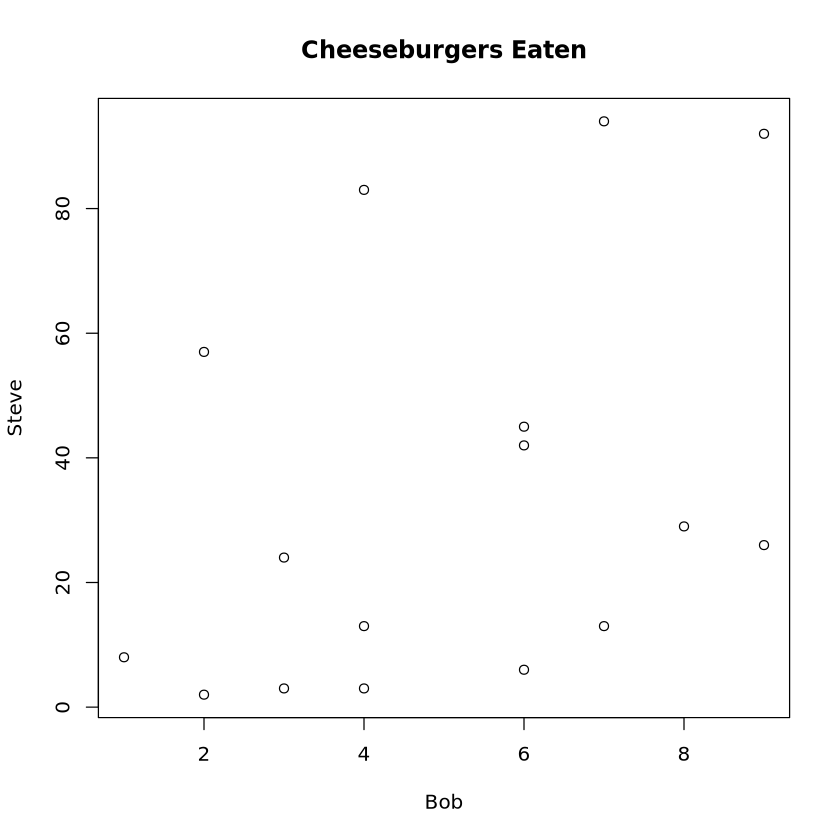

In [16]:
plot(new_data$Bob, new_data$Steve, main = "Cheeseburgers Eaten", xlab = "Bob", ylab = "Steve")

## Subsetting and targeting elements of R objects using indices

Although the function *subset* is useful to subset R objects by particular values, objects of classes *vector, matrix, array, and data frame* are designed for quick manipulation using indices. To illustrate this clearly, use the following commands to create a 3x4 matrix and look at it.

In [17]:
?matrix
mat <- matrix(1:12, nrow = 3, ncol = 4, byrow = TRUE)
mat

1,2,3,4
5,6,7,8
9,10,11,12


matrix {base},R Documentation
data,an optional data vector (including a list or expression vector). Non-atomic classed R objects are coerced by as.vector and all attributes discarded.
nrow,the desired number of rows.
ncol,the desired number of columns.
byrow,"logical. If FALSE (the default) the matrix is filled by columns, otherwise the matrix is filled by rows."
dimnames,"A dimnames attribute for the matrix: NULL or a list of length 2 giving the row and column names respectively. An empty list is treated as NULL, and a list of length one as row names. The list can be named, and the list names will be used as names for the dimensions."
x,an R object.
...,additional arguments to be passed to or from methods.
rownames.force,"logical indicating if the resulting matrix should have character (rather than NULL) rownames. The default, NA, uses NULL rownames if the data frame has ‘automatic’ row.names or for a zero-row data frame."


Notice that above each column R displays the index for that column, and likewise for each row. **Follow the steps below to create a new matrix based on the matrix "mat"**:

- 1) **Make column 1 a vector named "A"**
- 2) **Add columns 2 and 4 together to make a vector "B"**
- 3) **Multiply column 1 by 3 to make a vector "C"**
- 4) **Make a matrix named "new_mat" by binding vectors "A","B","C" by column**
- 5) **Look at matrix "new_mat"**
- 6) **Multiply the entire matrix "new_mat" by 2 to obtain "final_mat"**
- 7) **Look at matrix "final_mat"**

In [18]:
A <- mat[,1]                       # Step 1
B <- mat[,2] + mat[,4]             # Step 2
C <- mat[,1] * 3                   # Step 3
new_mat <- cbind(A,B,C)            # Step 4
new_mat                            # Step 5

A,B,C
1,6,3
5,14,15
9,22,27


In [19]:
final_mat <- new_mat * 2           # Step 6
final_mat                          # Step 7

A,B,C
2,12,6
10,28,30
18,44,54


One important note for plotting is that the syntax is different between data frames and matrices. Where data frames use the $ to extract vectors to plot against each other, matrices use the indices used above to create vectors. For example, we can plot the first and third columns of our new matrix "final_mat" against each other. **Run the following two lines of code together**:

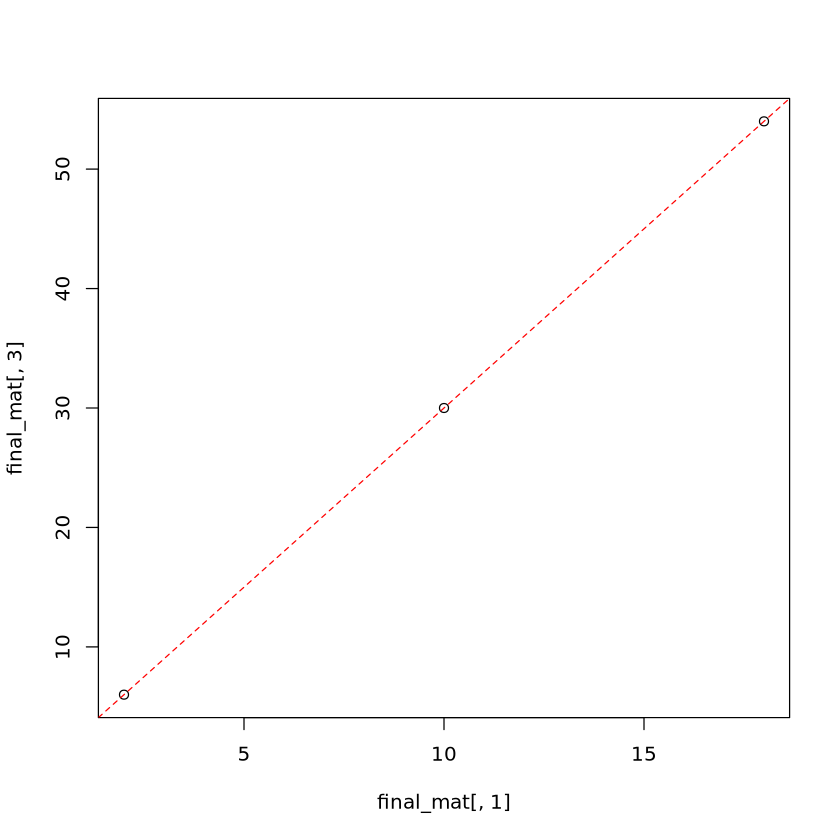

In [20]:
plot(final_mat[,1], final_mat[,3])
abline(a = 0, b = 3, col = "red", lty = "dashed")

You should see a red dashed line going through all three points.

## For-loops

Often in statistical genetics you may need to repeat something several times. For example, collating results over several replicates may require a for-loop that stores the results in an array. 

To illustrate the point, let's consider a simple example. 
Suppose we'd like to learn how the sample mean ($\bar{X}$) of 50 iid standard normal random variables, $X_1, \cdots, X_{50} \sim N(0, 1)$, behaves by simulation.
To obtain one sample mean, we need to first draw 50 samples, $X_1, \cdots, X_{50}$, from standard normal, and then calculate the sample mean as $\bar{X} = \frac{1}{n} \sum_i X_i$.
So, to obtain multiple copies of the sample mean, we need to repeat the above procedure multiple times.
Let's look at how we could implement it in R using for-loop (here we intent to obtain 1000 copies of sample mean). 

- 1) **Create an empty vector of length 1000 named "sample_means"**. We will fill this with sample means obtained in each replication.
- 2) **For each replication**
    - 2.1) **Draw 50 samples**
    - 2.2) **And calculate sample mean**
- 3) **Look at "sample_means" using `summary` function**

In [21]:
nrepeat = 1000
nsample = 50
sample_means <- rep(NA, nrepeat)                # Step 1

set.seed(999)  # a good practice is to set seed for your simulations
for (i in 1:nrepeat){
  samples_i = rnorm(nsample, mean = 0, sd = 1)  # Step 2.1
  sample_means[i] = mean(samples_i)             # Step 2.2
}
summary(sample_means)                           # Step 3

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.432031 -0.101489 -0.002243 -0.005156  0.090015  0.470665 

## Introduction to ggplot2

Although the standard plotting introduced in Section 2.4 will accomplish all of your plotting needs, many people prefer the aesthetics and functionality of plotting in ggplot2. We will do a basic introduction here, mainly to demonstrate the syntax.

First install and library the ggplot2.

In [22]:
# install.packages("ggplot2")
library(ggplot2)

Let's use the dataset in lab_0_ggplot_data.txt.

In [23]:
df <- read.table(file.path(myWorkingFolder, 'data/lab_0', 'lab_0_ggplot_data.txt'), header = T)
head(df)

,cell_type,status,count
,<chr>,<chr>,<dbl>
1,Alveolar1,untreated,6.289308
2,Alveolar1,treated,10.827468
3,Alveolar2,untreated,7.452884
4,Alveolar2,treated,13.600728
5,Basal,untreated,3.091082
6,Basal,treated,8.191246


It contains the average number of different cells in lung tissue samples before and after certain treatment procedures. Our plan is to draw a barplot to compare the cell counts (in million) before and after treatment. Instead of trying to create the "perfect" plot in a single attempt, we can will refine one layer at a time. This approach is called incremental development and can be especially useful for generating plots with complex features.

Create an empty canvas first. Do both axes represent what you are looking for?

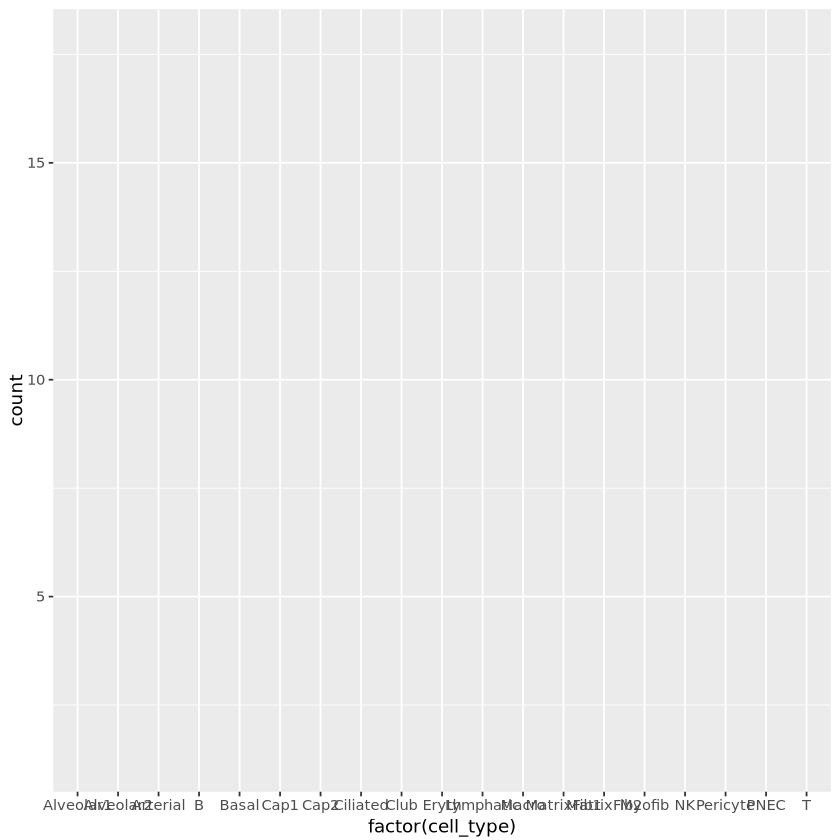

In [24]:
gg <- ggplot(df, aes(x = factor(cell_type), y = count, fill = status))
gg

It does, but the x-axis doesn't look pretty! We will deal with that later. Now we add bars that represent cell counts to the plot.

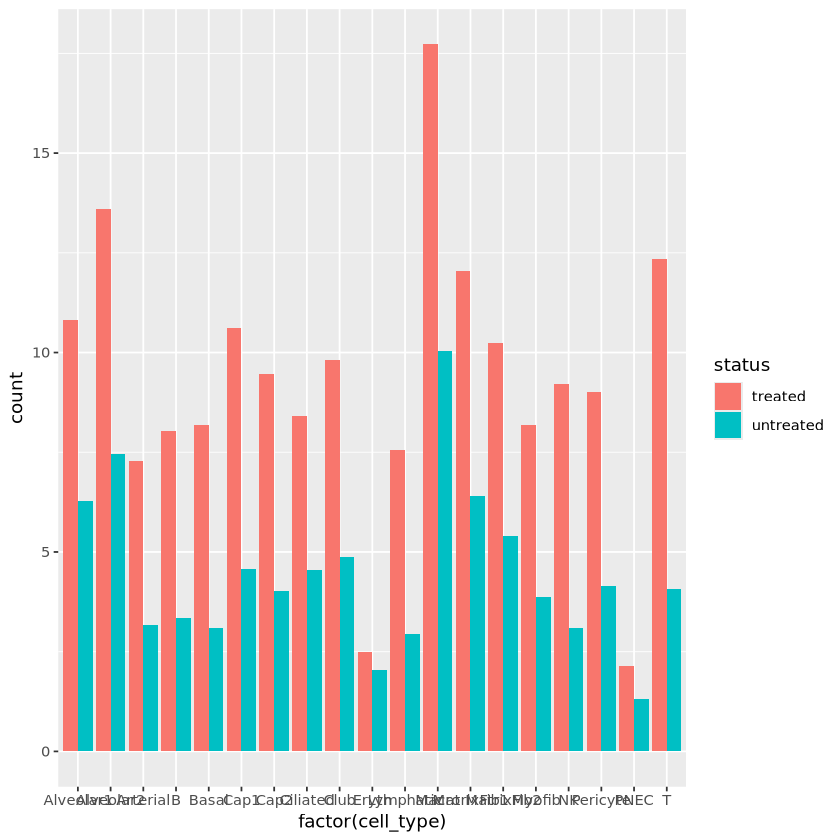

In [25]:
gg <- gg + geom_bar(stat = "identity", position = "dodge")
gg

Note that the label of y-axis is not very precise. What's the unit of measurement?

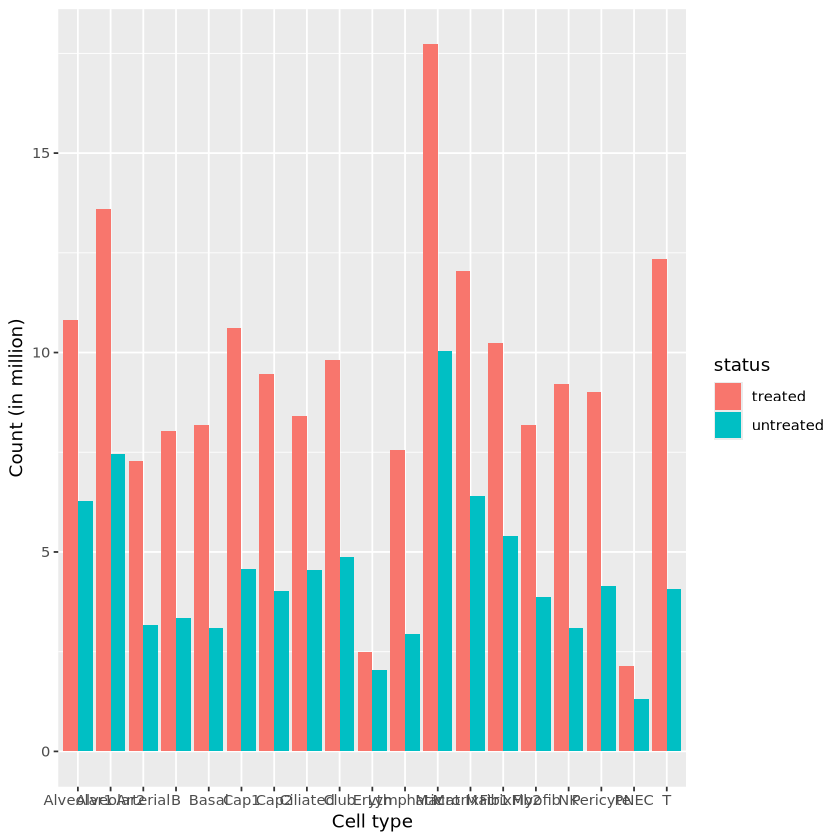

In [26]:
gg <- gg + labs(x = "Cell type" , y = "Count (in million)")
gg

About 8 percent of males and 0.5 percent of females are color blind, so it's likely that some of your audience will be among them. We need to pick from more accessible palettes (check https://davidmathlogic.com/colorblind/#%23FFC20A-%230C7BDC for more safe color choices).

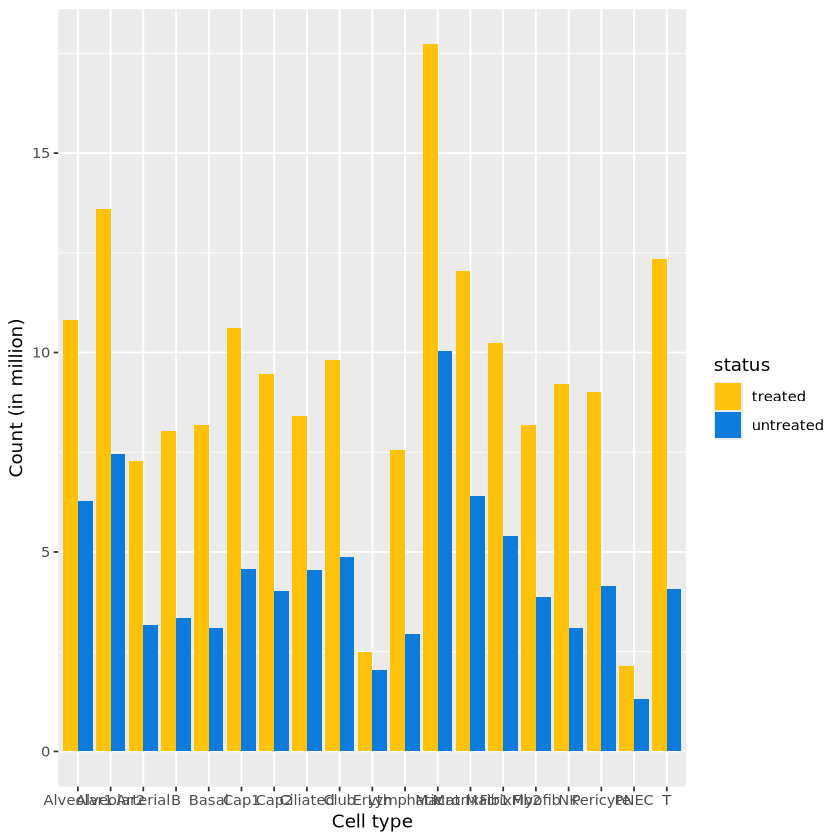

In [27]:
gg <- gg + scale_fill_manual(values = c("#FFC20A", "#0C7BDC"))
gg

The grids in the background seems kind of redundant, let's remove them.

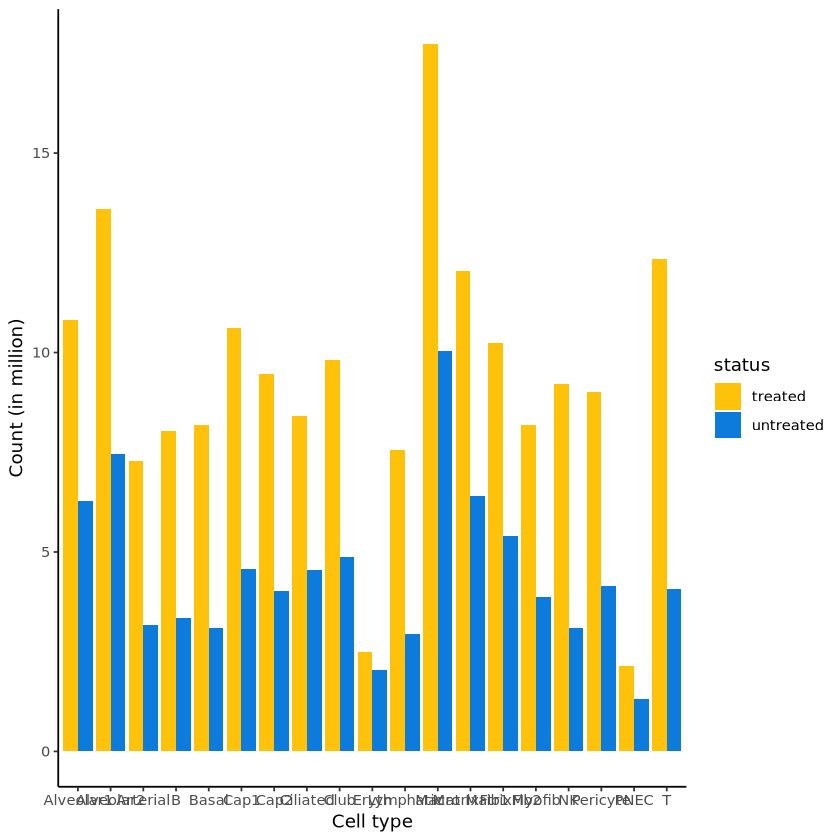

In [28]:
gg <- gg + theme(axis.line = element_line(color = 'black'), 
                 panel.background = element_blank(), 
                 panel.grid.major = element_blank(), 
                 panel.grid.minor = element_blank())
gg

Now we can turn to fix the overlapping labels on x-axis.

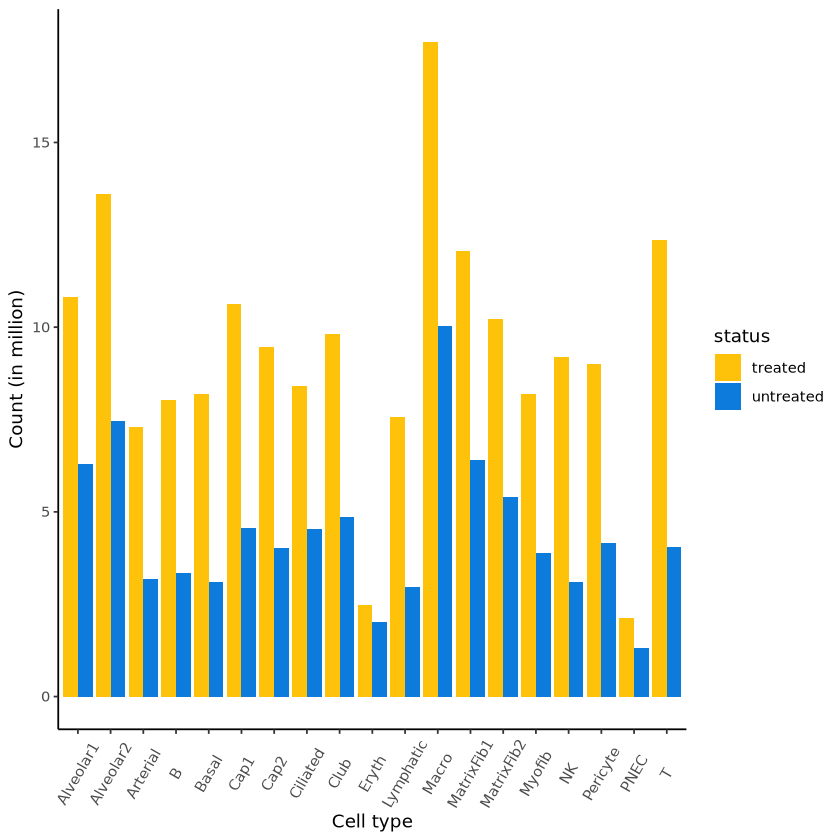

In [29]:
gg <- gg + theme(axis.text.x = element_text(angle = 60, vjust = 0.5))
gg

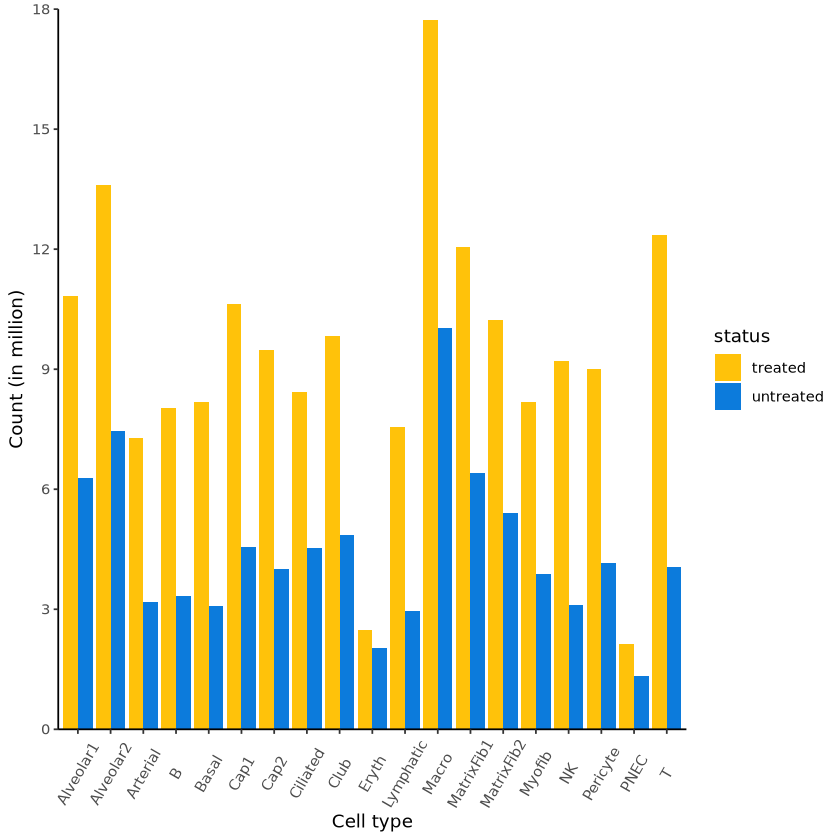

In [30]:
#Finally, let's bring the bars right atop of the x-axis. We can also adjust the limits and breaks on the y-axis.
gg <- gg + scale_y_continuous(limits = c(0, 18), breaks = seq(0, 18, 3), expand = c(0,0))
gg